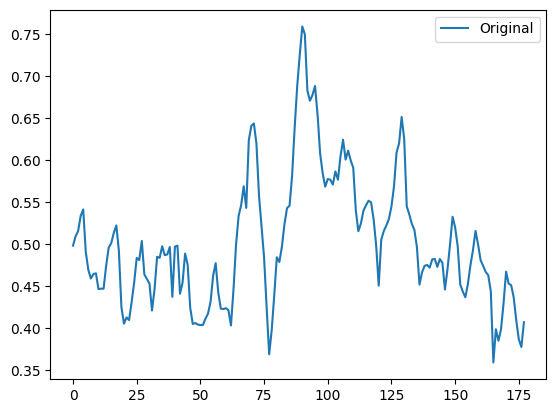

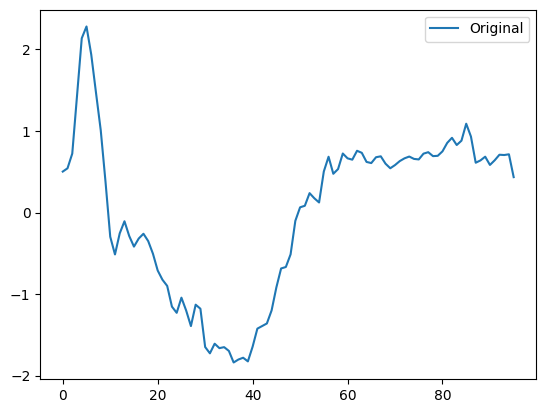

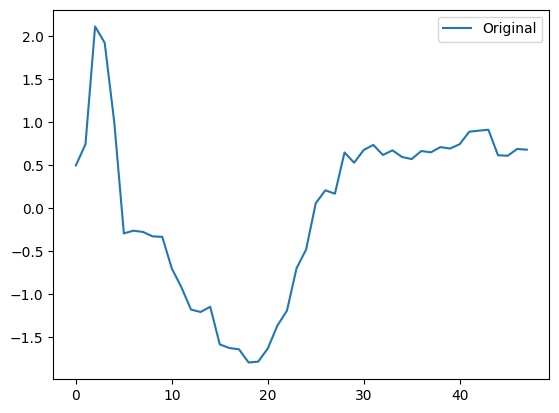

In [45]:
import numpy as np
from scipy import signal

def reduce_timeseries(x, n, method='mean'):
    """
    Reduce the dimensionality of a timeseries while preserving important information.
    
    Parameters:
    ts (np.ndarray): Input timeseries array
    n (int): Desired output length
    method (str): Reduction method ('mean', 'max', 'min', 'median', 'decimate', 'peaks')
    
    Returns:
    np.ndarray: Reduced timeseries
    """
    ts = x.copy()

    if len(ts) < n:
        raise ValueError("Output length must be smaller than input length")
        
    if method == 'decimate':
        # Decimation with filtering to prevent aliasing
        factor = len(ts) // n
        if factor > 1:
            return signal.decimate(ts, factor, n=int(np.ceil(len(ts)/n)))
        return ts
        
    elif method == 'peaks':
        # Preserve local maxima and interpolate
        peaks, _ = signal.find_peaks(ts)
        if len(peaks) > n:
            # If we have more peaks than desired points, select most prominent ones
            peak_values = ts[peaks]
            sorted_indices = np.argsort(peak_values)[-n:]
            selected_peaks = peaks[sorted_indices]
        else:
            selected_peaks = peaks
        
        # Create new x-axis points evenly spaced
        x_original = np.linspace(0, len(ts)-1, len(ts))
        x_new = np.linspace(0, len(ts)-1, n)
        
        # Interpolate between peaks
        reduced_ts = np.interp(x_new, x_original[selected_peaks], ts[selected_peaks])
        return reduced_ts
        
    else:
        # Split into n segments and apply reduction function
        splits = np.array_split(ts, n)
        
        if method == 'mean':
            return np.array([chunk.mean() for chunk in splits])
        elif method == 'max':
            return np.array([chunk.max() for chunk in splits])
        elif method == 'min':
            return np.array([chunk.min() for chunk in splits])
        elif method == 'median':
            return np.array([np.median(chunk) for chunk in splits])
        else:
            raise ValueError(f"Unknown method: {method}")


from saliencyserieslab.plotting import plot_graph
from aeon.datasets import load_classification

train = load_classification("ECG200", split="train")
ts = train[0][0][0]
ts_new = reduce_timeseries(ts, 48, method="decimate") 

plot_graph(ts)
plot_graph(ts_new)